<img align='right' style='max-width: 200px; height: auto' src='hsg_logo.png'>

# 7,861: Computer Vision

## Lab 02 - Linear Algebra and Image Manipulation

### Wednesday 04/10/2023

*Michael Mommert, Joëlle Hanna* - University of St. Gallen, Fall Term 2023


After today's lab, you should be able to:

- Implement basic linear algebra using NumPy

- Manipulate images by treating them as matrices

- Perform camera projections


As always, don't hesitate to ask all your questions either during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email).

# Submission:

Kindly submit your notebook by midnight on Tuesday, October 17 (yes, you have two weeks for this assignment), 2023 via e-mail to `joelle.hanna@unisg.ch`. 

IMPORTANT: Please save your file using the following format: lab02_firstname_lastname.ipynb.


# Content

1. [Linear Algebra](#linear_algebra)
    1. [Dot Product](#dot_product)
    2. [Matrix Multiplication](#matrix_multiplication)
2. [Image Manipulation](#image_manipulation)
    1. [Cropping](#cropping)
    2. [Rotation](#rotation)
    3. [Resizing](#resizing)
3. [Camera Projection](#camera_projection)

<a id='linear_algebra'></a>
# 1. Linear Algebra (2 points)


In [2]:
import numpy as np

* Exercise 1.1: Start by defining the following matrices and vectors using numpy. Look up `np.array()`. 

    Create $M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

    $$M = \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
    10 & 11 & 12 \end{bmatrix}
    $$

    $$a = \begin{bmatrix}
    1 & 1 & 0
    \end{bmatrix}
    $$

    $$b = \begin{bmatrix}
    -1 \\ 2 \\ 5
    \end{bmatrix}  
    $$ 

In [ ]:
## Your code here: 
M = 
a = 
b = 

In [7]:
assert M.shape == (4, 3)
assert a.shape == (1, 3)
assert b.shape == (3, 1)

<a id='dot_product'></a>
## 1.A. Dot Product


* Exercise 1.2: Implement the `dot_product()` method in and check that it returns the correct answer for $a^Tb$.

In [ ]:
## Your code HERE:
def dot_product(a, b):
    value = 
    return value

In [27]:
# Now, let's test out this dot product. Your answer should be [[1]].
aDotB = dot_product(a, b)

assert aDotB == [[1]]

In [28]:
print("The size is: ", aDotB.shape)

The size is:  (1, 1)


<a id='matrix_multiplication'></a>
## 1.B. Matrix Multiplication


* Exercise 1.3: Implement a `matrix_multiplication_function()` method in and use it to compute $(ab)Ma^T$

In [ ]:
## Your code HERE:

def matrix_multiplication_function(M, a, b):
    value = 
    return value

In [44]:
# Your answer should be [[3], [9], [15], [21]] of shape(4, 1).
ans = matrix_multiplication_function(M, a, b)
print(ans)
assert ans.shape == (4, 1)

[[ 3]
 [ 9]
 [15]
 [21]]


* Now try your `matrix_multiplication_function` function with other inputs:

In [45]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T

In [1]:
# Your answer should be [[20], [100]] of shape(2, 1).
ans = matrix_multiplication_function(M_2, a_2, b_2)
print(ans)
assert ans.shape == (2, 1)

<a id='image_manipulation'></a>
# 2. Image Manipulation (4 points)

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

Now that you are familiar with using matrices and vectors, let's load some images and treat them as matrices and do some operations on them.

*  Load the image baboon.tiff and display it

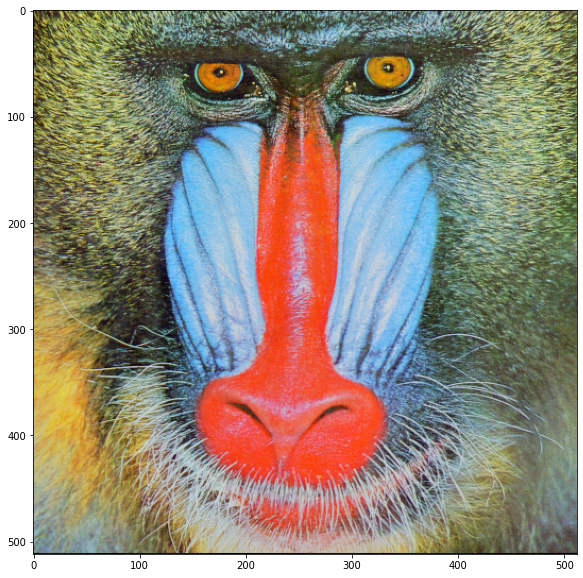

In [3]:
img = io.imread('data/baboon.tiff')

plt.imshow(img)

<a id='cropping'></a>
## 2.A. Cropping

One of the most common operations we perform when working with images is rectangular **cropping**, or the action of removing unwanted outer areas of an image.

* Exercise 2.1: Implement the `crop_image()` method by taking in the starting row index, starting column index, number of rows, and number of columns, and outputting the cropped image. 

In [9]:
def crop_image(image, start_row, start_col, num_rows, num_cols):
    out = None

    ## Your code HERE:

    return out


* Exercise 2.2: Now use the `crop_image()` method to crop the eyes and then display them

In [5]:
left_eye = 
right_eye = 
fig, axes = plt.subplots(1, 2)
axes[0].imshow(left_eye)
axes[0].set_title('Left Eye')
axes[1].imshow(right_eye)
axes[1].set_title('Right Eye')

* Now try to crop the image so that its centered, and half its size

In [8]:
out = 
plt.imshow(out)

<a id='rotation'></a>
## 2.B. Rotation

Another operation (more challenging) that you can try implementing is **image rotation**. We'll break it into smaller parts.

Before we start thinking about rotating full images, let's start by taking a look at rotating `(x, y)` coordinates:

<img style='max-width: 400px; height: auto' src='rotation.png'>

* Exercise 2.3: Using `np.cos()` and `np.sin()`, implement the `rotate2d()` method to compute the coordinates $(x', y')$ rotated by theta radians from $(x, y)$. 

(HINT: Create a rotation matrix -> X' = RX)

In [37]:
def rotate2d(point, theta):

    assert point.shape == (2,)
    assert isinstance(theta, float)

    
    ## YOUR CODE HERE
    out = 
    return out


In [38]:
assert rotate2d(np.array([1.0, 0.0]), 0.0).shape == (
    2,
), "Output shape incorrect!"
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), 0.0), np.array([1.0, 0.0])
), ""
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), np.pi / 2.0), np.array([0.0, 1.0])
), ""

Run the cell below to visualize a point as it's rotated around the origin by a set of evenly-spaced angles. You should see 10 points arranged in a circle.

In [1]:
# Visualize a point being rotated around the origin
import matplotlib.pyplot as plt

points = np.zeros((10, 2))
for i in range(10):
    points[i, :] = rotate2d(np.array([1.0, 0.0]), i / 10.0 * (2 * np.pi))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

* Exercise 2.4: The `rotate2d` function currently only rotates input points around the origin (0,0). How could we rotate the point around a center that isn't at the origin, using the same `rotate2d` function? **You'll need to do this when you implement image rotation below**

[Write your answer here]

* Exercise 2.5: Finally, use your rotate2d function in the `rotate_image(input_image, theta)` function, to rotate any image by theta.

In [56]:
def rotate_image(image, theta):

    height, width, _ = image.shape

    # Create an output image with the same shape as the input
    rotated_image = np.zeros_like(image)
    
    # Find the center point of rotated (or original) image.
    midx, midy =  
    
    for i in range(height):
        for j in range(width):
            
            # translate the coordinates (i, j) before the rotation
            point = 
            x, y = rotate2d(point, theta)

            # translate back the rotated coordinates (x, y)
            x = 
            y = 

            # fill the rotated_image with values
            if (x >= 0 and y >= 0 and x < image.shape[0] and  y < image.shape[1]):
                rotated_image[i, j, :] = image[x, y, :]
            

    return rotated_image

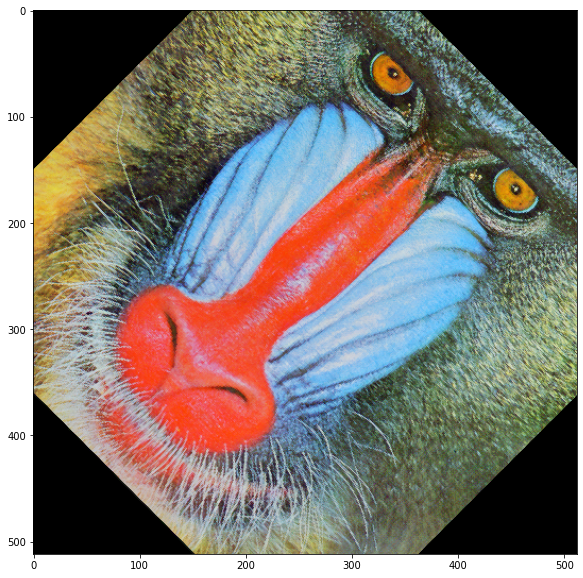

In [88]:
plt.imshow(rotate_image(img, np.pi / 4.0))

<a id='resizing'></a>
## 2.C. Resizing

Another commonly used operation is image resizing!

Let's try to implement it from scratch

* Exercise 2.6: Fill the missing parts in the `resize_image(input_image, new_height, new_width) function`

In [118]:
def resize_image(image, new_height, new_width):
    height, width, _ = image.shape
    
    factor_height = int(height / new_height)
    factor_width = int(width / new_width)

    # Create an output image with the desired shape
    resized_image = np.zeros(shape=(new_height, new_width, 3))
    
    # loop over all pixels, calculate the corresponding coordinates in the input image and assign pixel value from input image to output image
    for i in range(new_height):
        for j in range(new_width):
            # Your code HERE:
            
        

    # Return the output image
    return resized_image.astype(int)

Try downsizing the baboon to 16x16:

In [123]:
resized_image = resize_image(img, 16, 16)

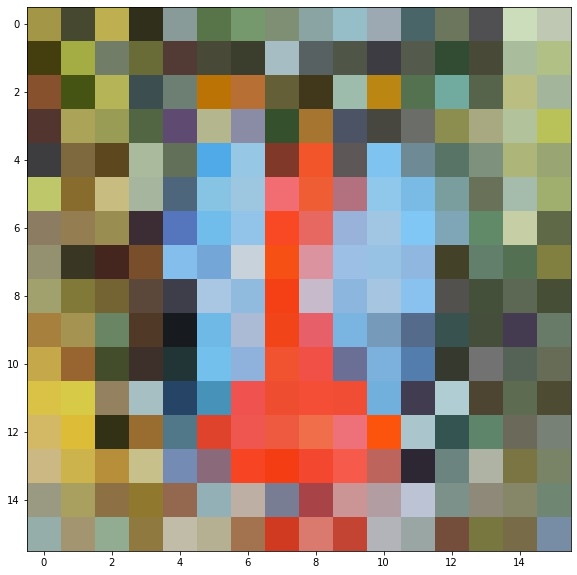

In [124]:
plt.imshow(resized_image)

Now try to stretch it horizontally to 50x500:

In [135]:
resized_image = resize_image(img, 50, 500)

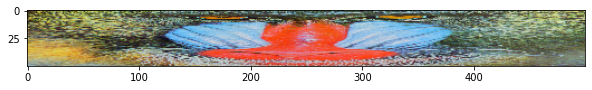

In [136]:
plt.imshow(resized_image)

<a id='camera_projection'></a>
## 3. Camera Projection (4 points)

As you have seen in the lecture, in order to make sense of how objects in our world are rendered in a camera, we typically need to understand how they are located relative to the camera. This is very important, in many applications, such as robotics (guidance) or autonomous driving for example.

In this exercise, you will explore some of the geometry that underlies how camera images are formed. More specifically, you will learn to convert (X,Y,Z)-coordinates of an object in our world into pixel coordinates (u,v) on an image.

(u, v) denote pixel coordinates, with the reference point being the top-left corner of the image. The central point of the image serves as the origin, referred to as the principal point O. We know the focal length (f) and the optical center (C). 

To execute the transformation from World to Pixel coordinates, a three-step process is required:

1. Transform the world point ($X_w$, $Y_w$, $Z_w$), into a new coordinate system in which the camera's optical center C is set as the origin (0, 0, 0). This transformation usually involves a rotation (R) and a translation (t).
    $$\begin{bmatrix}
    x_c \\ y_c \\ z_c
    \end{bmatrix}  = \begin{bmatrix} R|t \end{bmatrix} \begin{bmatrix}
    x_w \\ y_w \\ z_w \\ 1
    \end{bmatrix}
    $$
2. Convert the resulting camera point ($X_c$, $Y_c$, $Z_c$) into new coordinates within the same coordinate system on the optical sensor, denoted as (x, y, z), by using the camera's intrinsic parameter matrix K.
    $$\begin{bmatrix}
    x \\ y \\ z
    \end{bmatrix}  = K \begin{bmatrix}
    x_c \\ y_c \\ z_c
    \end{bmatrix} = K \begin{bmatrix} R|t \end{bmatrix} \begin{bmatrix}
    x_w \\ y_w \\ z_w \\ 1
    \end{bmatrix}
    $$
3. Convert the coordinates (x, y, z) into pixel coordinates (u, v) by normalizing with respect to z and repositioning the origin of the image.

* Exercise 3.1: First, define the rotation matrix R and the translation vector t and create the augmented matrix T = [R|t]:

    $$R = \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
     \end{bmatrix}
    $$

    $$t = \begin{bmatrix}
    -0.1 \\ -0.1 \\ 0.4
    \end{bmatrix}  
    $$ 

In [ ]:
# Rotation matrix
R = 

# Translation vector
t = 

# Augmented matrix T
T = 

In [ ]:
print(T)

* Exercise 3.2: Now transform the origin P = (X,Y,Z) = (0, 0, 0) from World coordinates ($X_w$, $Y_w$, $Z_w$) to the Camera coordinates ($X_c$, $Y_c$, $Z_c$):

HINT: Remember the trick of adding an additional component (1) to the vector P. 

In [ ]:
# Define P (in World Coordinate system)
Pw = 

# Project Pw into the cameras coordinate system Pc
Pc = 

In [ ]:
print(Pc)

Now we need to define the matrix K. This matrix is called of intrinsic parameters, or calibration matrix. It defines the internal properties of the Camera: Its focal length and the resolution. 
    $$K = \begin{bmatrix}
    f & 0 & c_x \\
    0 & f & c_y \\
    0 & 0 & 1 \\
     \end{bmatrix}
    $$

Reminder, ($c_x$, $c_y$) are defined as follows:

<img style='max-width: 400px; height: auto' src='reminder_coord_p0.png'>

* Exercise 3.3: Given an image resolution of 700x500 pixels and a focal length of 420 pixels, define the calibration matrix K, then map Pc=(Xc, Yc, Zc) to p=(x, y, z):

In [ ]:
# Cameras intrinsic parameters [K]
K = 


# Map Pc to P
p = 

In [ ]:
print(p)

* Exercise 3.4: Finally, normalize by z to get (u, v, 1) and then print the (u, v) coordinates:

In [ ]:
## Your code HERE:
uv = 

In [ ]:
assert np.allclose(
    uv, np.array([[237.22710163],
       [ 94.96361355]])
)